# This notebook contains preliminary results

In [8]:
%load_ext autoreload
%autoreload 2 
%matplotlib inline

# Set path to find modelling tools for later use
import os
import sys
sys.path.append(os.path.join(os.getcwd(),".."))


from tabulate import tabulate # Have to dowload this on laptop
from pathlib import Path
from haberrspd.__init_paths import data_root
from haberrspd.preprocess_baseline import (reference_sentences,
                                           calculate_iki_and_ed_baseline,
                                           calculate_all_baseline_ROC_curves,
                                           convert_df_to_subject_level,
                                           get_X_and_y_from_df,
                                           test_different_splits_for_classification)

from haberrspd.plotting import plot_roc_curve_simple, plot_superimposed_roc_curves, nice_fonts
import pandas as pd
import numpy as np

# Plot stuff
import seaborn as sns
from scipy.constants import golden
import matplotlib as mpl
import matplotlib.pyplot as plt


# Settings for plotting

# plt.style.use('dark_background')
# Set to default again
# plt.rcParams.update(plt.rcParamsDefault)
# mpl.rcParams.update(nice_fonts)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Baseline classifiers

## MJFF [sentence level]

In [18]:
# Load data
df = pd.read_csv(data_root / 'MJFF' / 'raw' / 'EnglishData-duplicateeventsremoved.csv')
df_meta = pd.read_csv(data_root / 'MJFF' / 'raw' / 'EnglishParticipantKey.csv',
                      header=0,
                      names=["participant_id", "ID", "attempt", "diagnosis"],
                     )

In [19]:
which_attempt = 1

df_baselines_raw = calculate_iki_and_ed_baseline(df=df,
                                                 df_meta=df_meta,
                                                 drop_shift=False,
                                                 attempt=which_attempt,
                                                 invokation_type=-1) # No changes have been made
df_baselines_edited = calculate_iki_and_ed_baseline(df=df,
                                                    df_meta=df_meta,
                                                    drop_shift=False,
                                                    attempt=which_attempt,
                                                    invokation_type=1) # Error corrections have been made

MJFF
MJFF


In [25]:
print(tabulate(df_baselines_raw[(df_baselines_raw.Diagnosis == 0)].describe(),tablefmt="grid", headers='keys'))

+-------+---------------+-------------+------------+-----------+-----------------+
|       |   Sentence_ID |   Diagnosis |   Mean_IKI |   Var_IKI |   Edit_Distance |
+=======+===============+=============+============+===========+=================+
| count |     741       |         741 |    741     |    741    |        741      |
+-------+---------------+-------------+------------+-----------+-----------------+
| mean  |      61.9811  |           0 |    314.472 |  63608.4  |        105.71   |
+-------+---------------+-------------+------------+-----------+-----------------+
| std   |       4.32525 |           0 |    101.504 |  39685.5  |         99.1941 |
+-------+---------------+-------------+------------+-----------+-----------------+
| min   |      55       |           0 |    120.333 |   2696.31 |          0      |
+-------+---------------+-------------+------------+-----------+-----------------+
| 25%   |      58       |           0 |    239.92  |  35593.8  |         54      |
+---

In [ ]:
print(df_baselines_raw.Edit_Distance.var())
print(df_baselines_edited.Edit_Distance.var())

out1 = calculate_all_baseline_ROC_curves(df_baselines_raw)
out2 = calculate_all_baseline_ROC_curves(df_baselines_edited)

In [ ]:
plot_superimposed_roc_curves([out1,out2],
                             'mjff_attempt_' + str(which_attempt) +'_sentence_level_rfc')

## MRC [sentence level]

To do:

1. Re-calculate the raw MRC data to remove duplicate entries (i.e. only one response ID per (participant, sentence ID) -- *keep the smallest one*
    - Re-pickle all the files for MRC as they are not correct as it stands.
    - Upload new raw data to the google drive
2. Re-do all the results for MRC including sentence level and participant level
3. If (1) is done then it should be possible to run the (keydown, keyup) sorting properly

In [16]:
df = pd.read_pickle(Path('../data/MRC/') / 'processed_mcr.pkl')

#### In this setting we drop all shift keys

In [3]:
df_baselines_raw = calculate_iki_and_ed_baseline(df, 
                                                 drop_shift=True, 
                                                 invokation_type=-1) # No changes have been made
df = pd.read_pickle(Path('../data/MRC/') / 'processed_mcr.pkl')
df_baselines_edited = calculate_iki_and_ed_baseline(df, 
                                                    drop_shift=True, 
                                                    invokation_type=1) # Error corrections have been made

MRC

 Number of shift-rows dropped: 16879
MRC

 Number of shift-rows dropped: 16879


In [11]:
print(tabulate(df_baselines_raw[(df_baselines_raw.Diagnosis == 1)].describe().round(3),tablefmt="grid", headers='keys'))

+-------+--------------+---------------+-------------+------------+-----------+-----------------+
|       |   Patient_ID |   Sentence_ID |   Diagnosis |   Mean_IKI |   Var_IKI |   Edit_Distance |
+=======+==============+===============+=============+============+===========+=================+
| count |     1171     |      1171     |        1171 |   1171     |   1171    |        1171     |
+-------+--------------+---------------+-------------+------------+-----------+-----------------+
| mean  |       66.368 |         7.974 |           1 |    134.171 |  10646    |          13.646 |
+-------+--------------+---------------+-------------+------------+-----------+-----------------+
| std   |       30.505 |         4.331 |           0 |     32.583 |   5809.39 |          12.803 |
+-------+--------------+---------------+-------------+------------+-----------+-----------------+
| min   |       11     |         1     |           1 |     61.195 |   1864.92 |           2     |
+-------+-----------

In [30]:
# This dataframe is was calculated from the faulty dataset which contained sentence duplicates for some participants
print(tabulate(df_baselines_raw[(df_baselines_raw.Diagnosis == 1)].describe(),tablefmt="grid", headers='keys'))

+-------+--------------+---------------+-------------+------------+-----------+-----------------+
|       |   Patient_ID |   Sentence_ID |   Diagnosis |   Mean_IKI |   Var_IKI |   Edit_Distance |
+=======+==============+===============+=============+============+===========+=================+
| count |    1170      |    1170       |        1170 |  1170      |   1170    |       1170      |
+-------+--------------+---------------+-------------+------------+-----------+-----------------+
| mean  |      66.4145 |       7.97009 |           1 |   133.795  |  10489.8  |         19.2684 |
+-------+--------------+---------------+-------------+------------+-----------+-----------------+
| std   |      30.4762 |       4.33025 |           0 |    32.1316 |   5550.47 |         52.8687 |
+-------+--------------+---------------+-------------+------------+-----------+-----------------+
| min   |      11      |       1       |           1 |    61.1969 |   1864.11 |          2      |
+-------+-----------

In [12]:
out1 = calculate_all_baseline_ROC_curves(df_baselines_raw)
out2 = calculate_all_baseline_ROC_curves(df_baselines_edited)

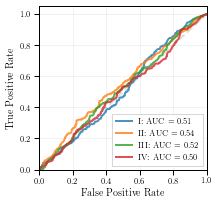

In [14]:
# For reasons unknown we can only run this once...
plot_superimposed_roc_curves([out1,out2],'mrc_with_dropped_shift_keys_sentence_level')

#### We keep the shift key

In [17]:
df_baselines_raw = calculate_iki_and_ed_baseline(df, 
                                                 drop_shift=False, 
                                                 invokation_type=-1) # No changes have been made
df_baselines_edited = calculate_iki_and_ed_baseline(df, 
                                                    drop_shift=False,
                                                    invokation_type=1) # Error corrections have been made

MRC
MRC


In [18]:
a = calculate_all_baseline_ROC_curves(df_baselines_raw)
b = calculate_all_baseline_ROC_curves(df_baselines_edited)

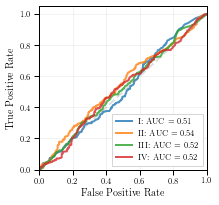

In [19]:
plot_superimposed_roc_curves([a,b],'mrc_shift_keys_kept_sentence_level')

### MJFF [subject level]

In [ ]:
df_baselines_raw.head()

In [ ]:
for i in [df_baselines_raw, df_baselines_edited]:
    outs = get_X_and_y_from_df(convert_df_to_subject_level(i))
    for j in ['I','II']:
        print(j,test_different_splits_for_classification(outs[j]))

### MRC [subject level]

In [20]:
def get_X_and_y_from_df(df):

    measures = ["Edit_Distance", "Mean_IKI", "Diagnosis"]
    # assert set(measures).issubset(df.columns)
    features = ["Mean_IKI", ["Edit_Distance", "Mean_IKI"]]

    # Store all results in a dict which will be passed to plotting
    sets = {"I": None, "II": None}
    # assert len(sets) == len(features)
    for i, j in zip(features, sets.keys()):
        
        # List of features
        if isinstance(i, list):
            assert len(i) == 2
            X = []
            for k in range(df.shape[0]):
                X.append(df.loc[k,i[0]] + df.loc[k,i[1]])
            X = np.vstack(X)
            
        # Singular feature
        else:
            X = np.vstack(df[i])

        # targets
        y = df.Diagnosis.to_numpy()

        sets[j] = (X, y)

    return sets

In [21]:
part = convert_df_to_subject_level(df_baselines_raw)

In [22]:
# out = convert_df_to_subject_level(df_baselines_raw)
outs = get_X_and_y_from_df(part)

In [23]:
# We use the version with shift keys kept
for i in [df_baselines_raw, df_baselines_edited]:
    outs = get_X_and_y_from_df(convert_df_to_subject_level(i))
    for j in ['I','II']:
        print(j, test_different_splits_for_classification(outs[j]))

I (0.787, 0.067)
II (0.952, 0.022)
I (0.797, 0.053)
II (0.981, 0.015)



I (0.791, 0.047)
II (0.947, 0.027)
I (0.789, 0.062)
II (0.976, 0.016)

# Modelling CHARACTERS ('char') only

This commences the CNN approach to the task.

In [24]:
char = {100 : np.genfromtxt('../results/char/label_and_label_probs_2019-07-30_16-03-33.csv', delimiter=','), 
        200 : np.genfromtxt('../results/char/label_and_label_probs_2019-07-30_16-37-21.csv', delimiter=','), 
        500 : np.genfromtxt('../results/char/label_and_label_probs_2019-07-30_17-46-29.csv', delimiter=',')}

Number of hyperparameter permutations considered: 100



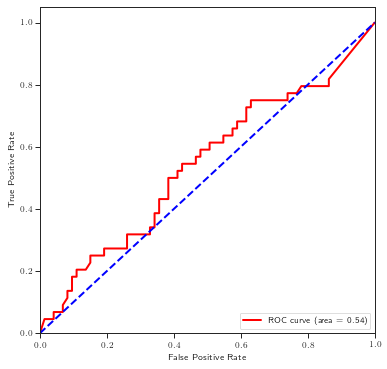

Number of hyperparameter permutations considered: 200



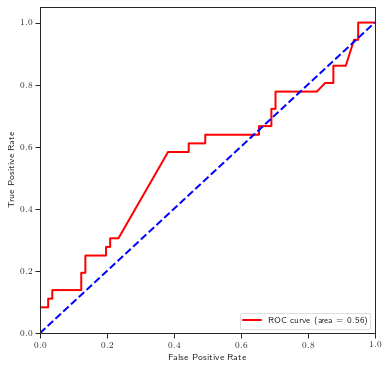

Number of hyperparameter permutations considered: 500



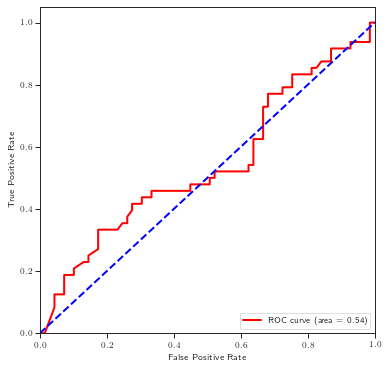

In [25]:
for key in char.keys():
    print("Number of hyperparameter permutations considered: {}\n".format(key))
    plot_roc_curve_simple(char[key][:,0].astype(np.int64), char[key][:,1])

In [ ]:
plot_roc_curve_simple(char[200][:,0].astype(np.int64), char[200][:,1],'mjff_char_only')

# CHARACTERS and TIME

In [26]:
char_time = {100 : np.genfromtxt('../results/char_time/label_and_label_probs_2019-07-26_21-25-18.csv', delimiter=','), 
 200 : np.genfromtxt('../results/char_time/label_and_label_probs_2019-07-26_15-00-06.csv', delimiter=','), 
 500 : np.genfromtxt('../results/char_time/label_and_label_probs_2019-07-26_12-24-09.csv', delimiter=',')}

Number of hyperparameter permutations considered: 100



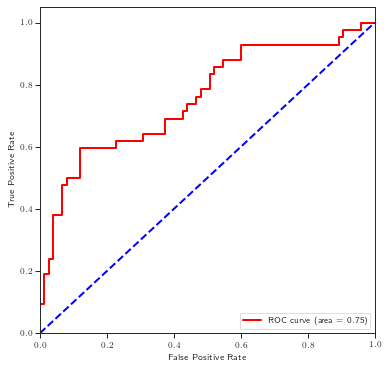

Number of hyperparameter permutations considered: 200



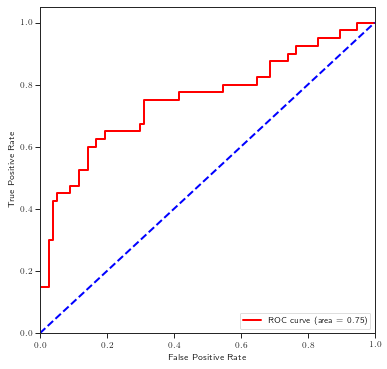

Number of hyperparameter permutations considered: 500



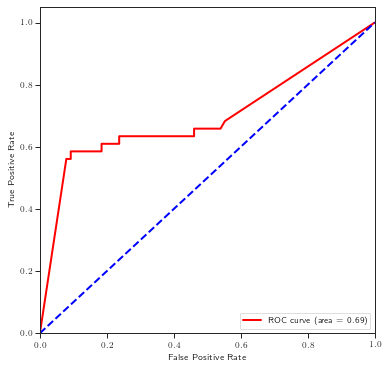

In [27]:
for key in char_time.keys():
    print("Number of hyperparameter permutations considered: {}\n".format(key))
    plot_roc_curve_simple(char_time[key][:,0].astype(np.int64), char_time[key][:,1])

In [ ]:
plot_roc_curve_simple(char_time[200][:,0].astype(np.int64), char_time[200][:,1],'mjff_char_time')

# CHARACTERS and TIME and Space

In [28]:
char_time_space = {100 : np.genfromtxt('../results/char_time_space/label_and_label_probs_2019-07-30_15-46-27.csv', delimiter=','), 
                   500 : np.genfromtxt('../results/char_time_space/label_and_label_probs_2019-07-30_21-34-27.csv', delimiter=',')}

Number of hyperparameter permutations considered: 100



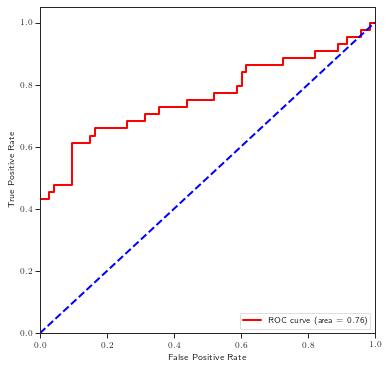

Number of hyperparameter permutations considered: 500



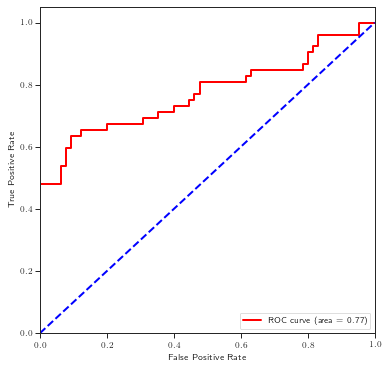

In [29]:
for key in char_time_space.keys():
    print("Number of hyperparameter permutations considered: {}\n".format(key))
    plot_roc_curve_simple(char_time_space[key][:,0].astype(np.int64), char_time_space[key][:,1])

In [ ]:
plot_roc_curve_simple(char_time_space[500][:,0].astype(np.int64), char_time_space[500][:,1],'mjff_char_time_space')

In [ ]:
# Check the details of the best model for one of the optimisations
df = pd.read_csv("../results/char_time_space/073019144454.csv")

In [ ]:
# Sort by validation accuracy
df.sort_values(by=['val_acc'],ascending=False).head(10)

In [ ]:
# Detailed look at the "winning model"
df.iloc[387,:]